<a href="https://colab.research.google.com/github/Carlos19033/IA-003-2025/blob/main/Assignments/AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROCESSING DATASETS IN PYTHON**

HOUR: N1

TEAM:

- CARLOS ALBERTO SAUCEDO RIOS, 1968121
- MARIANGELES SOFIA RODRIGUEZ UZCATEGUI, 2132315
- AMANDA GUADALUPE BUSTOS BANDA, 2052995

# PART 1: DATA LOADING AND EXPLORATION

In [ ]:
# Load libraries
import pandas as pd #Used for handling datasets
import numpy as np #Used for numerical operations and statistical calculations
import matplotlib.pyplot as plt #Used for plotting data
from sklearn.preprocessing import MinMaxScaler #Used for scaling data

In [ ]:
# Load data from a csv files
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
#Show the first 10 rows off all the columns conteined in the csv
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# This function gives us an overview of the dataset, showing the number of entries, any missing values (nulls), and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# This function identifies missing values in each column, and .sum() calculates the total number of missing entries per column
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [52]:
"""
The describe() function provides a statistical summary of the dataset, including count, mean, std, min, and max values.
It helps detect anomalies, such as physiological values that should not be zero, highlighting columns that may need closer inspection.
"""
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# PART 2: Data Cleaning and Normalization


In [53]:
"""
This loop iterates over selected columns with a minimum value of zero.
The variable 'column_name' holds the column name for each iteration, and replace() substitutes all zeros with the column's median.
The cleaned dataset is stored in df_clean.
.head(10) is used to verify that zeros, such as in the Insulin column, have been replaced correctly.
"""
df_clean = df.copy()
for i in range(1,6):  # Loop over indices of selected columns
    column_name = df_clean.columns[i]  # Store column name for easier reference
    df_clean[column_name] = df_clean[column_name].replace(0, df_clean[column_name].median())  # Replace zeros with the column median
df_clean.head(10)  # Display first 10 rows to check replacements


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


NORMALIZATION

Method1

In [ ]:
df_normalized = df_clean.copy()  # Create a copy to avoid modifying the original dataset

scaler = MinMaxScaler()  # This function scales all values in a column between 0 and 1, where 1 is the highest and 0 is the lowest

df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_normalized.columns)# Normalize all numeric columns

df_normalized.head(10)  # Display the first 10 rows to verify normalization


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
5,0.294118,0.464516,0.510204,0.173913,0.019832,0.151329,0.052519,0.150000,0.0
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1.0
7,0.588235,0.458065,0.489796,0.173913,0.019832,0.349693,0.023911,0.133333,0.0
8,0.117647,0.987097,0.469388,0.413043,0.635817,0.251534,0.034159,0.533333,1.0
9,0.470588,0.522581,0.734694,0.173913,0.019832,0.282209,0.065756,0.550000,1.0


Method2

In [ ]:
"""
We normalize using an alternative method. First, the DataFrame is converted into a numeric matrix.
We access each column to obtain its minimum and maximum values and perform normalization using the formula: (matrix - min_vals) / (max_vals - min_vals).
The normalized data is stored in a temporary variable, and then converted back into a DataFrame.
"""

df_normalized2 = df_clean.copy()  # Use a copy of the dataset
matrix = df_normalized2.values  # Convert the DataFrame to a numeric matrix
min_vals = np.min(matrix, axis=0)  # Obtain the minimum values for each column
max_vals = np.max(matrix, axis=0)  # Obtain the maximum values for each column
df_temp = (matrix - min_vals) / (max_vals - min_vals)  # Normalize the matrix
df_Normalized2 = pd.DataFrame(df_temp, columns=df_clean.columns)  # Convert the normalized matrix back into a DataFrame
df_Normalized2.head(10)  # Display the first 10 rows to verify normalization


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
5,0.294118,0.464516,0.510204,0.173913,0.019832,0.151329,0.052519,0.150000,0.0
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1.0
7,0.588235,0.458065,0.489796,0.173913,0.019832,0.349693,0.023911,0.133333,0.0
8,0.117647,0.987097,0.469388,0.413043,0.635817,0.251534,0.034159,0.533333,1.0
9,0.470588,0.522581,0.734694,0.173913,0.019832,0.282209,0.065756,0.550000,1.0


Method3

In [ ]:
"""
This normalization method, similar to the previous process of replacing zeros, performs normalization individually on each column of the dataset.
"""

df_normalized3 = df_clean.copy()  # Create a copy of the dataset
for i in range(0, 8):
    column_name = df_clean.columns[i]  # Helper variable to reference the column name
    min_val = df_clean[column_name].min()  # Get minimum value for normalization
    max_val = df_clean[column_name].max()  # Get maximum value for normalization
    df_normalized3[column_name] = (df_clean[column_name] - min_val) / (max_val - min_val)  # Apply normalization and store results
df_normalized3.head(10)  # Verify that all values are scaled between 0 and 1 and results match other normalization methods


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
5,0.294118,0.464516,0.510204,0.173913,0.019832,0.151329,0.052519,0.150000,0
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1
7,0.588235,0.458065,0.489796,0.173913,0.019832,0.349693,0.023911,0.133333,0
8,0.117647,0.987097,0.469388,0.413043,0.635817,0.251534,0.034159,0.533333,1
9,0.470588,0.522581,0.734694,0.173913,0.019832,0.282209,0.065756,0.550000,1


# PART 3: DATA VISUALIZATION

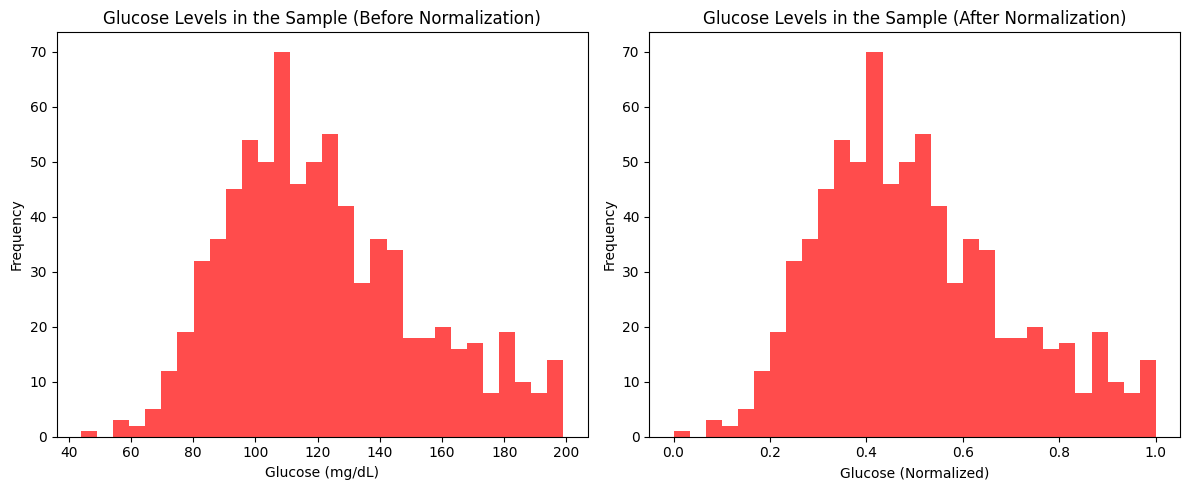

In [54]:
"""
A histogram displays the distribution of a population across possible values or ranges of values, allowing us to see the frequency
of each value and the overall shape of the data.
"""

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#Plot 1
axs[0].hist(matrix[:, 1], bins=30, color='red', alpha=0.7)  # Draw histogram: number of bins controls the resolution, color sets the bar color, alpha sets transparency
axs[0].set_title("Glucose Levels in the Sample (Before Normalization)")  # Title
axs[0].set_xlabel("Glucose (mg/dL)")  # X-axis label
axs[0].set_ylabel("Frequency")  # Y-axis label

#Plot 2
axs[1].hist(df_normalized3['Glucose'], bins=30, color='red', alpha=0.7)  # Draw histogram for normalized data
axs[1].set_title("Glucose Levels in the Sample (After Normalization)")  # Title
axs[1].set_xlabel("Glucose (Normalized)")  # X-axis label
axs[1].set_ylabel("Frequency")  # Y-axis label

plt.tight_layout()  # Adjust subplots so that labels and titles do not overlap
plt.show()  # Display the plots


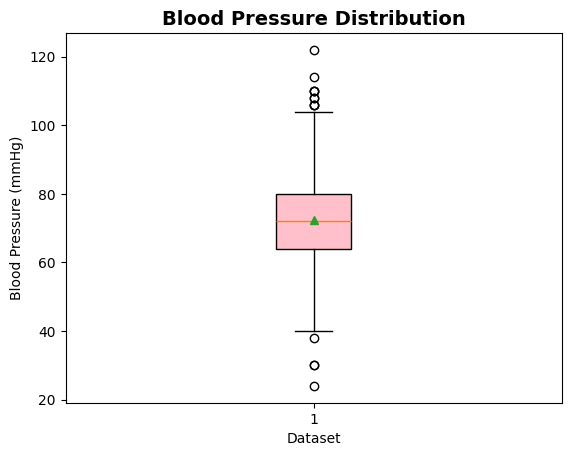

In [55]:
"""
A box plot shows the distribution of a dataset through its quartiles.
The box represents the interquartile range (IQR), the line inside the box indicates the median,
and the dots represent outliers, which are values significantly higher or lower than the rest of the data.
"""

plt.boxplot(df_clean['BloodPressure'], vert=True, patch_artist=True, showmeans=True, boxprops=dict(facecolor="pink"))

plt.title("Blood Pressure Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Blood Pressure (mmHg)")  # Original, not normalized
plt.xlabel("Dataset")

plt.show()  # Display the box plot


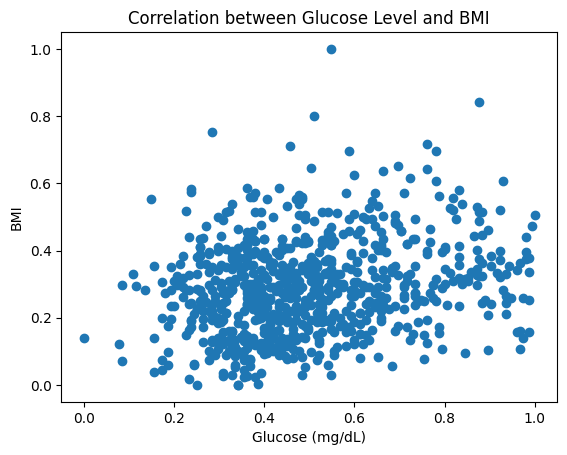

In [ ]:
"""
This scatter plot allows us to observe potential trends or correlations between Glucose levels and Body Mass Index (BMI).
"""

plt.scatter(df_normalized['Glucose'], df_normalized['BMI'])  # Plot the two variables to explore correlation

# Titles and labels
plt.title("Correlation between Glucose Level and BMI")
plt.xlabel("Glucose (mg/dL)")
plt.ylabel("BMI")

plt.show()  # Display the scatter plot


In [ ]:
# Count the number of occurrences for each outcome using value_counts()
count_present = df['Outcome'].value_counts()[0]  # Number of entries with outcome 0 (e.g., absence)
count_absent = df['Outcome'].value_counts()[1]   # Number of entries with outcome 1 (e.g., presence)

print(count_present)
print(count_absent)


500
268


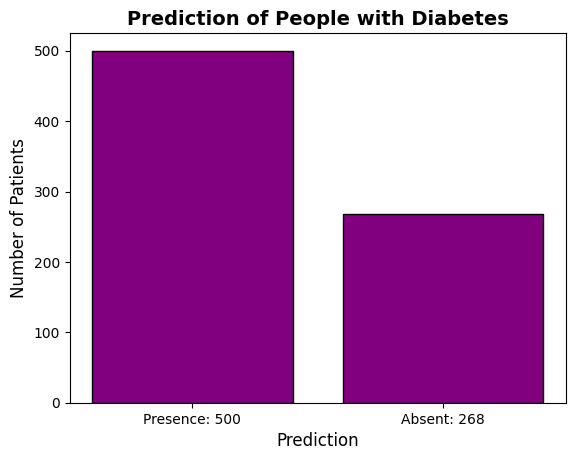

In [56]:
"""
This bar chart allows us to visualize the distribution of a population for a dichotomous variable
and to see its relationship graphically.
"""

categories = ['Presence: 500', 'Absent: 268']  # Interpret the states of the variable
values = [count_present, count_absent]        # Values to plot

# Create vertical bar chart
bars = plt.bar(categories, values, color="purple", edgecolor="black")

# Titles and labels
plt.title("Prediction of People with Diabetes", fontsize=14, fontweight='bold')
plt.xlabel("Prediction", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

plt.show()  # Display the bar chart


## PART 4: CUESTIONS

1) What impact do missing values have on data analysis?

Missing values can significantly impact data analysis, particularly when zeros appear in biomedical variables such as Insulin, SkinThickness, or BMI. In these cases, zeros are not physiologically plausible and likely represent missing information. As we saw in the tables from df.describe(), some variables contained zeros that should be considered missing rather than true measurements. Treating them as valid values can bias statistical results and reduce the predictive accuracy of models.

To address this issue, the dataset was preprocessed by replacing zeros with the median of each variable. When zeros are substituted with the median, the variance and standard deviation tend to decrease because the zeros act as downward outliers, artificially inflating data dispersion. Using the median, a measure of central tendency, brings the observations closer to the mean, reducing overall variability.

This approach improves the homogeneity of the data and ensures that the measurements better represent the true biological phenomenon. In other words, median imputation generates a more coherent and realistic dataset, where values more faithfully reflect the central distribution, enhancing the quality, reliability, and interpretability of subsequent analyses.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. How can we detect and handle outliers in biomedical datasets?

Outliers are values that deviate significantly from the normal range of a dataset, and in biomedical studies they may arise from measurement errors or unrealistic entries. In this analysis, they can be identified both visually and statistically. For example, in the boxplot of variables such as Glucose, BloodPressure.

To address this, the IQR method can be applied, flagging observations that fall outside the interquartile range.

The boxplot of blood pressure shows the central 50% of data within the pink box, with the median as a line inside and the mean possibly indicated by a green triangle. Whiskers extend to 1.5×IQR beyond Q1 and Q3, and points outside represent outliers, as seen in the graph.




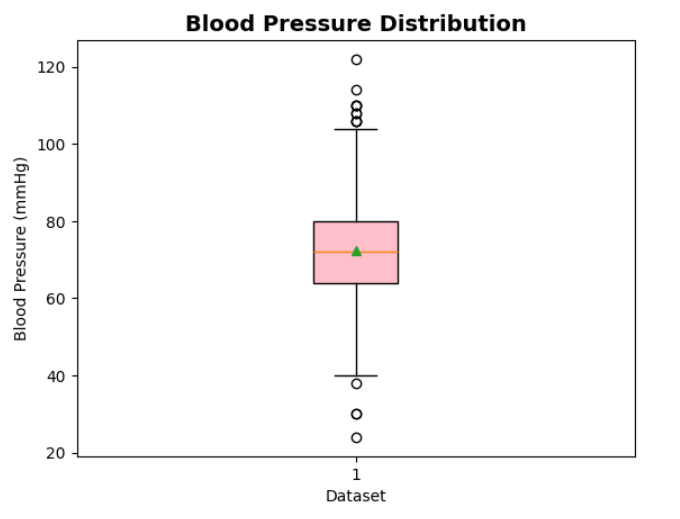

3. What are some common causes of missing or incorrect data in biomedical studies?

Missing or incorrect data in biomedical studies are frequent and arise from various factors. Patients may skip specific medical tests, which explains values such as glucose or insulin equal to zero in the dataset. Human error is also common, for instance when a healthcare professional forgets to record blood pressure or makes a mistake during data entry. Technical problems, such as a malfunction in a glucose sensor or other biomedical devices, may also result in incomplete data. Furthermore, differences in measurement protocols between hospitals can cause inconsistencies. In the analysis performed in Python, the replacement of zeros with median values was a strategy to address this issue, ensuring that the dataset better reflected real biological values


4. How does normalizing data improve the performance of Machine Learning models?

Normalization is the process of scaling variables so that they all fall within a similar range, usually between 0 and 1. In Python, this was done using manual formulas, NumPy functions, and the MinMaxScaler from scikit-learn.

This is important because biomedical variables in the dataset have very different ranges. For example, glucose values go from 44 to 199, while the Diabetes Pedigree Function ranges from 0.07 to 2.42. Without normalization, variables with larger numbers would dominate calculations, making it harder to analyze patterns fairly.

By normalizing, all features contribute proportionally. Training models becomes faster, calculations are more stable, and patterns in the data are easier to detect. For instance, a glucose value of 117 was scaled to approximately 0.67, and a BMI value of 32 to about 0.51. After normalization, both variables influence the analysis equally, which helps ensure reliable and balanced results.


5. Why is visualizing data an important step before applying Machine Learning models?

Data visualization is important because it helps to better understand the dataset before using it in a model. Through graphs such as histograms, boxplots, or scatter plots, it is possible to detect patterns, identify outliers, find relationships between variables, and check whether the data is well distributed. This allows us to make decisions about what transformations or adjustments are needed and prevents the model from working with incorrect or cconfusing information.


6. Why is preprocessing critical when working with medical datasets?

Preprocessing is critical because medical data often contains missing values, errors, or vvariables on different scales that can negatively affect the performance of a model. By cleaning, normalizing, and organizing the dataset, we ensure that the information is more accurate and consistent, which makes Machine Learning models more reliable. In addition, in medical data, errors can lead to incorrect predictions that may directly affect patients'health, so this step is essential.


7. What ethical concerns should be considered when handling patient data?

When working with medical data, it is necessary to respect patients' privacy and confidentiality, protecting their identity and ensuring that the data is not used without consent. It is also important to avoid biases in the dataset that could result in unfair diagnoses or decisions. Overall, medical information should always with the purpose of benefiting patients rather than misusing their sensitive data.